In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #resolving issue with keras killing kernel

In [3]:


# Загрузка датасета MNIST
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Нормализация данных и изменение формы для подачи в модель
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Создание модели автоэнкодера
def build_autoencoder():
    # Энкодер
    encoder_input = layers.Input(shape=(28, 28, 1))
    encoder_output = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoder_input)
    encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
    encoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
    encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)
    encoder_output = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
    encoder_output = layers.MaxPooling2D((2, 2), padding='same')(encoder_output)

    # Декодер
    decoder_input = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_output)
    decoder_input = layers.UpSampling2D((2, 2))(decoder_input)
    decoder_input = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(decoder_input)
    decoder_input = layers.UpSampling2D((2, 2))(decoder_input)
    decoder_input = layers.Conv2D(16, (3, 3), activation='relu')(decoder_input)
    decoder_input = layers.UpSampling2D((2, 2))(decoder_input)
    decoder_output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoder_input)

    # Создание модели
    autoencoder = models.Model(encoder_input, decoder_output)
    return autoencoder

# Построение модели
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Обучение модели
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
469/469 [==============================] - 106s 225ms/step - loss: 0.2065 - val_loss: 0.1489
Epoch 2/10
469/469 [==============================] - 102s 216ms/step - loss: 0.1380 - val_loss: 0.1281
Epoch 3/10
469/469 [==============================] - 100s 213ms/step - loss: 0.1243 - val_loss: 0.1193
Epoch 4/10
469/469 [==============================] - 103s 221ms/step - loss: 0.1176 - val_loss: 0.1141
Epoch 5/10
469/469 [==============================] - 117s 249ms/step - loss: 0.1137 - val_loss: 0.1107
Epoch 6/10
469/469 [==============================] - 120s 256ms/step - loss: 0.1108 - val_loss: 0.1085
Epoch 7/10
469/469 [==============================] - 133s 284ms/step - loss: 0.1087 - val_loss: 0.1064
Epoch 8/10
469/469 [==============================] - 129s 274ms/step - loss: 0.1069 - val_loss: 0.1048
Epoch 9/10
469/469 [==============================] - 152s 324ms/step - loss: 0.1053 - val_loss: 0.1032
Epoch 10/10
469/469 [==============================] - 151s 322m

313/313 [==============================] - 1s 3ms/step


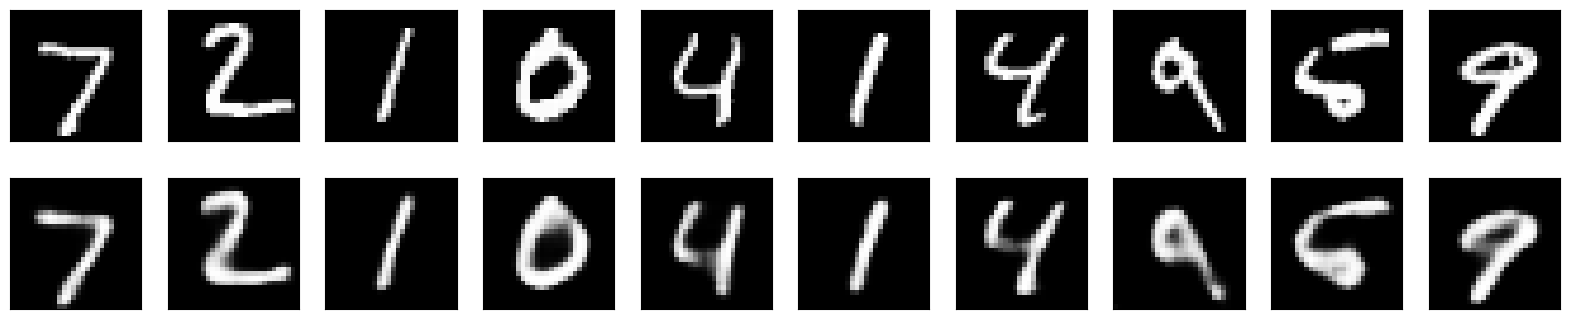

In [4]:
# Предсказание с использованием обученного автоэнкодера
decoded_imgs = autoencoder.predict(x_test)

# Отображение оригинальных и восстановленных изображений
import matplotlib.pyplot as plt

n = 10  # Количество изображений для отображения
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригинальные изображения
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Восстановленные изображения
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [5]:
autoencoder.save('autoenc.h5') 
